# Funktion von Gruben in Zentralafrika

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import math  # für die Volumen-Berechnung

con = sqlite3.connect("../data/CongoDB.sqlite")

In [2]:
df = pd.read_csv('../data/base/Gruben_NutzungFunktion.csv', decimal = ',', encoding = 'latin1')

# Volumen der Gruben berechnen
df['Volumen'] = ((math.pi / 4) * (df['2_Dm'])**2) * df['3_T']

# Funddichte berechnen
df['Funddichte'] = df['Keramik_kg'] / df['Volumen']

display(df.head())

,Fundort_Name,Fundort,Komplex,Lat,Long,Region,1_Grubendepot,2_Dm,3_T,Keramik_kg,...,14_SeelenLoch,15_Holkohle,16_verzLehm,17_Laterit,18_Palmnuesse,19_Eisen-Schlacke-Fragmente,Datierung,Literatur,Volumen,Funddichte
0,Baringa,BAR,85/1,NaN,NaN,InnerCongo,x,1.6,0.38,13.22,...,NaN,x,x,x,x,S+F,NaN,Wotzka 1993,0.764035,17.302865
1,Benkombo,BEN,81/1/I,NaN,NaN,InnerCongo,x,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wotzka 1993,NaN,NaN
2,Benkombo,BEN,81/1/II,NaN,NaN,InnerCongo,x,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wotzka 1993,NaN,NaN
3,Benkombo,BEN,81/1/III,NaN,NaN,InnerCongo,x,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wotzka 1993,NaN,NaN
4,Benkombo,BEN,81/1/IV,NaN,NaN,InnerCongo,x,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wotzka 1993,NaN,NaN


In [3]:
x = df['2_Dm']
y = df['3_T']
s1 = df['Volumen']
s2 = df['Funddichte']

## subsetting - *Gruben in IYONDA (inkl. 2015)*

In [4]:
# nur IYO
df_iyo = df[(df['Fundort']) == 'IYO']
x2 = df_iyo['2_Dm']
y2 = df_iyo['3_T']

In [12]:
fig = plt.figure(1)
fig.set_size_inches(10, 6)

plt.subplot(121, aspect='equal')
plt.scatter(x, y, c = 'grey', s = 50)
plt.scatter(x2, y2, c = 'red', s = 100) # Site = IYO
plt.xlim([0,2.5])
plt.ylim([0,4.5])
plt.xlabel("Durchmesser [m]")
plt.ylabel("Tiefe [cm]")
plt.gca().invert_yaxis() # invertiert die Y-Achse
plt.show()

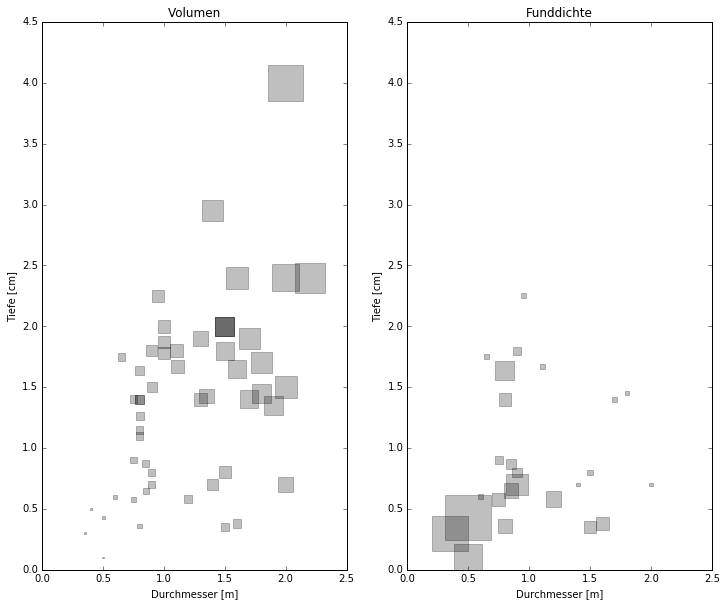

In [36]:
fig = plt.figure(1)
fig.set_size_inches(12, 10)

plt.subplot(121, aspect='equal')

plt.scatter(x, y, s1*100, c='black', alpha=0.25, marker = 's')
plt.xlim([0,2.5])
plt.ylim([0,4.5])
plt.title('Volumen')
plt.xlabel("Durchmesser [m]")
plt.ylabel("Tiefe [cm]")

plt.subplot(122, aspect='equal')
plt.xlim([0,2.5])
plt.ylim([0,4.5])
plt.scatter(x, y, s2*10, c='black', alpha=0.25, marker = 's')
plt.title('Funddichte')
plt.xlabel("Durchmesser [m]")
plt.ylabel("Tiefe [cm]")

plt.show()

**ToDo**
* [ ] Korrespondenzanalyse (in R/vegan)

## Tabelle für LaTeX aufbereiten und exportieren

In [39]:
display(df.head())

,Fundort_Name,Fundort,Komplex,Lat,Long,Region,1_Grubendepot,2_Dm,3_T,Keramik_kg,...,14_SeelenLoch,15_Holkohle,16_verzLehm,17_Laterit,18_Palmnuesse,19_Eisen-Schlacke-Fragmente,Datierung,Literatur,Volumen,Funddichte
0,Baringa,BAR,85/1,NaN,NaN,InnerCongo,x,1.6,0.38,13.22,...,NaN,x,x,x,x,S+F,NaN,Wotzka 1993,0.764035,17.302865
1,Benkombo,BEN,81/1/I,NaN,NaN,InnerCongo,x,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wotzka 1993,NaN,NaN
2,Benkombo,BEN,81/1/II,NaN,NaN,InnerCongo,x,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wotzka 1993,NaN,NaN
3,Benkombo,BEN,81/1/III,NaN,NaN,InnerCongo,x,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wotzka 1993,NaN,NaN
4,Benkombo,BEN,81/1/IV,NaN,NaN,InnerCongo,x,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wotzka 1993,NaN,NaN


In [42]:
# Spalten auswählen
df_a = df[["Fundort_Name", 
           "Komplex", 
           "4_Verf-Bereiche", 
           "5a_organMantel", 
           "5b_ScherbenMantel", 
           "6_intentZerst", 
           "7_Scherbenpackung",
           "8_komplGef", 
           "9_umgestGef", 
           "10_liegendeGef", 
           "11_ineinander_gestGef", 
           "12_Mdg-Verschl", 
           "isolGef_Grubensohle", 
           "13_ zerstAppl", 
           "14_SeelenLoch", 
           "15_Holkohle", 
           "16_verzLehm", 
           "17_Laterit",
           "18_Palmnuesse", 
           "19_Eisen-Schlacke-Fragmente",
           "Literatur"]]

# Spalten umbenennen
# \\rotatebox{90}{Fundort} führt zu vertikal laufendem Text in LaTeX

df_a = df_a.rename(columns={"Fundort_Name": '\\rotatebox{90}{Fundort}', 
           "Komplex": '\\rotatebox{90}{Komplex}', 
           "4_Verf-Bereiche": '\\rotatebox{90}{4 Verf.-Ber.}', 
           "5a_organMantel": '\\rotatebox{90}{5a organ. Mantel}', 
           "5b_ScherbenMantel": '\\rotatebox{90}{5b Scherben-Mantel}', 
           "6_intentZerst": '\\rotatebox{90}{6 int. Zerst.}', 
           "7_Scherbenpackung": '\\rotatebox{90}{7 Scherbenpackung}',
           "8_komplGef": '\\rotatebox{90}{8 kompl. Gef.}', 
           "9_umgestGef": '\\rotatebox{90}{9 umgest. Gef.}', 
           "10_liegendeGef": '\\rotatebox{90}{10 liegende Gef.}', 
           "11_ineinander_gestGef": '\\rotatebox{90}{11 ineinandergestellte Gef.}', 
           "12_Mdg-Verschl": '\\rotatebox{90}{12 Mdg. Verschluss}', 
           "isolGef_Grubensohle": '\\rotatebox{90}{isol. Gef. Grubensohle}', 
           "13_ zerstAppl": '\\rotatebox{90}{13 zerst. Appliquen}', 
           "14_SeelenLoch": '\\rotatebox{90}{14 Seelenloch}', 
           "15_Holkohle": '\\rotatebox{90}{15 Holzkohle}', 
           "16_verzLehm": '\\rotatebox{90}{16 verz. Lehm}', 
           "17_Laterit": '\\rotatebox{90}{17 Laterit}',
           "18_Palmnuesse": '\\rotatebox{90}{18 Palmnuss}', 
           "19_Eisen-Schlacke-Fragmente": '\\rotatebox{90}{19 Eisen/Schlacken/Fragm.}',
           "Literatur": '\\rotatebox{90}{Literatur}'})

# NaN gegen leeren Zellen ersetzen
df_a = df_a.replace(np.nan, '')

display(df_a.head())

,\rotatebox{90}{Fundort},\rotatebox{90}{Komplex},\rotatebox{90}{4 Verf.-Ber.},\rotatebox{90}{5a organ. Mantel},\rotatebox{90}{5b Scherben-Mantel},\rotatebox{90}{6 int. Zerst.},\rotatebox{90}{7 Scherbenpackung},\rotatebox{90}{8 kompl. Gef.},\rotatebox{90}{9 umgest. Gef.},\rotatebox{90}{10 liegende Gef.},...,\rotatebox{90}{12 Mdg. Verschluss},\rotatebox{90}{isol. Gef. Grubensohle},\rotatebox{90}{13 zerst. Appliquen},\rotatebox{90}{14 Seelenloch},\rotatebox{90}{15 Holzkohle},\rotatebox{90}{16 verz. Lehm},\rotatebox{90}{17 Laterit},\rotatebox{90}{18 Palmnuss},\rotatebox{90}{19 Eisen/Schlacken/Fragm.},\rotatebox{90}{Literatur}
0,Baringa,85/1,,,,,,,,,...,,,,,x,x,x,x,S+F,Wotzka 1993
1,Benkombo,81/1/I,,,,,,,,,...,,,,,,,,,,Wotzka 1993
2,Benkombo,81/1/II,,,,,,,,x,...,,,,,,,,,,Wotzka 1993
3,Benkombo,81/1/III,,,,,,,x,x,...,,,,,,,,,,Wotzka 1993
4,Benkombo,81/1/IV,,,,,,,,,...,,,,,,,,,,Wotzka 1993


In [43]:
df_a.to_latex('../output/data/5_Gruben_NutzungFunktion.tex', index = False, escape = False)

> evtl. in zwei vertikale Teile aufspalten (li. & re. Seite)?